The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. Each person is classified as good (1) or bad (0) credit risks according to the set of attributes.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv(r"C:\Users\GRZEGORZ\Downloads\GermanCredit.csv")
df.sample(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
334,... < 100 DM,24,no credits taken/all credits paid back duly,radio/television,4110,... < 100 DM,... >= 7 years,3,male : single,none,...,unknown/no property,23,bank,rent,2,skilled employee/official,2,no,yes,0
766,... < 100 DM,30,existing credits paid back duly till now,radio/television,3108,... < 100 DM,... < 1 year,2,male : divorced/separated,none,...,building society savings agreement/life insurance,31,none,own,1,unskilled - resident,1,no,yes,0
930,... < 100 DM,24,existing credits paid back duly till now,radio/television,1747,... < 100 DM,... < 1 year,4,male : single,co-applicant,...,building society savings agreement/life insurance,24,none,own,1,unskilled - resident,1,no,no,1
312,... >= 200 DM / salary for at least 1 year,24,existing credits paid back duly till now,radio/television,3749,... < 100 DM,... < 1 year,2,female : divorced/separated/married,none,...,car or other,26,none,own,1,skilled employee/official,1,no,yes,1
899,... < 100 DM,18,existing credits paid back duly till now,radio/television,4153,... < 100 DM,1 <= ... < 4 years,2,male : single,co-applicant,...,car or other,42,none,own,1,skilled employee/official,1,no,yes,0


<br>

### Data cleaning

In [75]:
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


##### 'personal_status_sex' column

In [76]:
df['personal_status_sex'].value_counts()

personal_status_sex
male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: count, dtype: int64

In [77]:
df[['sex', 'personal_status']] = df['personal_status_sex'].str.split(':', expand=True)

In [78]:
df['sex'] = df['sex'].str.strip()
df['personal_status'] = df['personal_status'].str.strip()

In [79]:
df.drop(columns=['personal_status_sex'], inplace=True)

##### 'savings' column

In [80]:
df['savings'].value_counts()

savings
... < 100 DM                  603
unknown/no savings account    183
100 <= ... < 500 DM           103
500 <= ... < 1000 DM           63
... >= 1000 DM                 48
Name: count, dtype: int64

In [81]:
df.replace({'savings': {'... < 100 DM': '<100',
                        'unknown/no savings account': 'Unknown/None',
                        '100 <= ... < 500 DM': '100-499',
                        '500 <= ... < 1000 DM': '500-999',
                        '... >= 1000 DM': '>= 1000'}}, inplace=True)

##### 'status' column

In [82]:
df['status'].value_counts()

status
no checking account                           394
... < 100 DM                                  274
0 <= ... < 200 DM                             269
... >= 200 DM / salary for at least 1 year     63
Name: count, dtype: int64

In [83]:
df.replace({'status': {'no checking account': 'No account',
                       '... < 100 DM': '< 100',
                       '0 <= ... < 200 DM': '0–199',
                       '... >= 200 DM / salary for at least 1 year': '>= 200'}}, inplace=True)

##### 'purpose' column

In [84]:
df['purpose'].value_counts()

purpose
domestic appliances    280
car (new)              234
radio/television       181
car (used)             103
others                  97
retraining              50
education               22
repairs                 12
furniture/equipment     12
business                 9
Name: count, dtype: int64

In [85]:
df.replace({'purpose': {'radio/television': 'Radio/TV',
                        'car (new)': 'car',
                        'car (used)': 'car'}}, inplace=True)

##### 'employment_duration' column

In [86]:
df['employment_duration'].value_counts()

employment_duration
1 <= ... < 4 years    339
... >= 7 years        253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: count, dtype: int64

In [87]:
df.replace({'employment_duration': {'4 <= ... < 7 years': '4-6 years',
                       '... < 1 year': '< 1 year',
                       '1 <= ... < 4 years': '1-3 years',
                       '... >= 7 years': '>= 7 years'}}, inplace=True)

<br>

### Exploratory Data Analysis (EDA)
#### Duration column

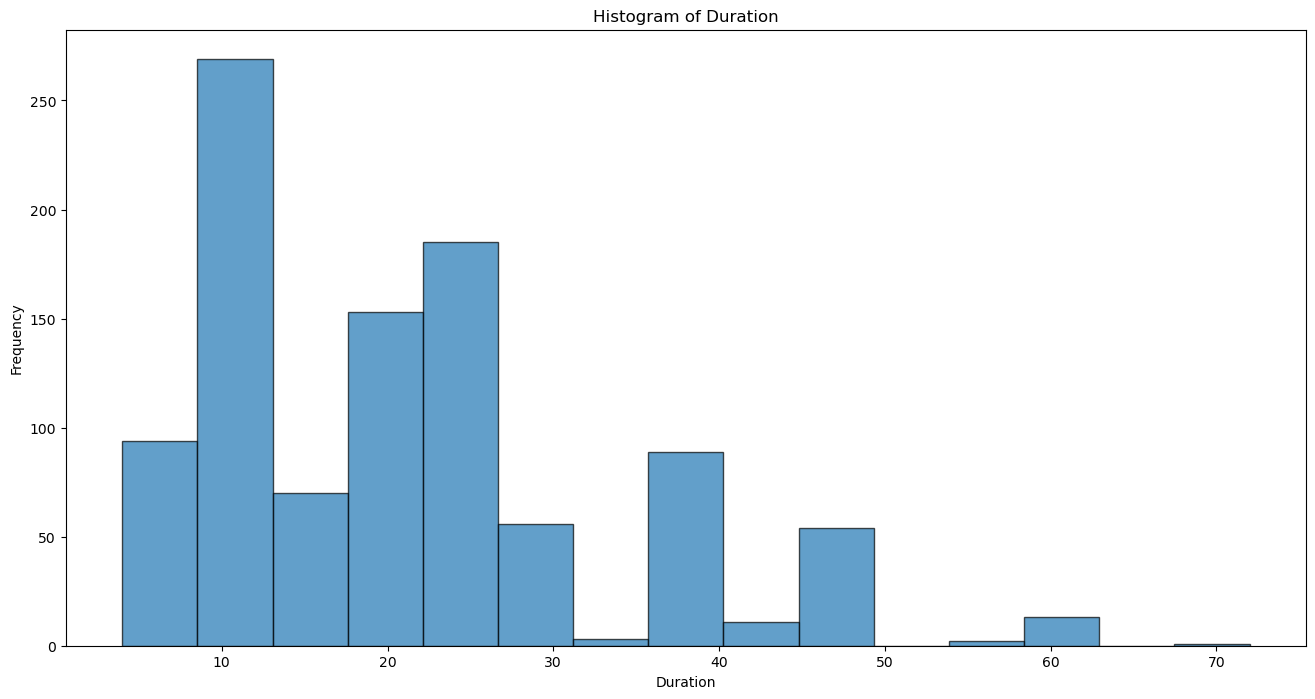

In [154]:
plt.figure(figsize=(16, 8))
plt.hist(df['duration'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [155]:
df['duration'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: duration, dtype: float64

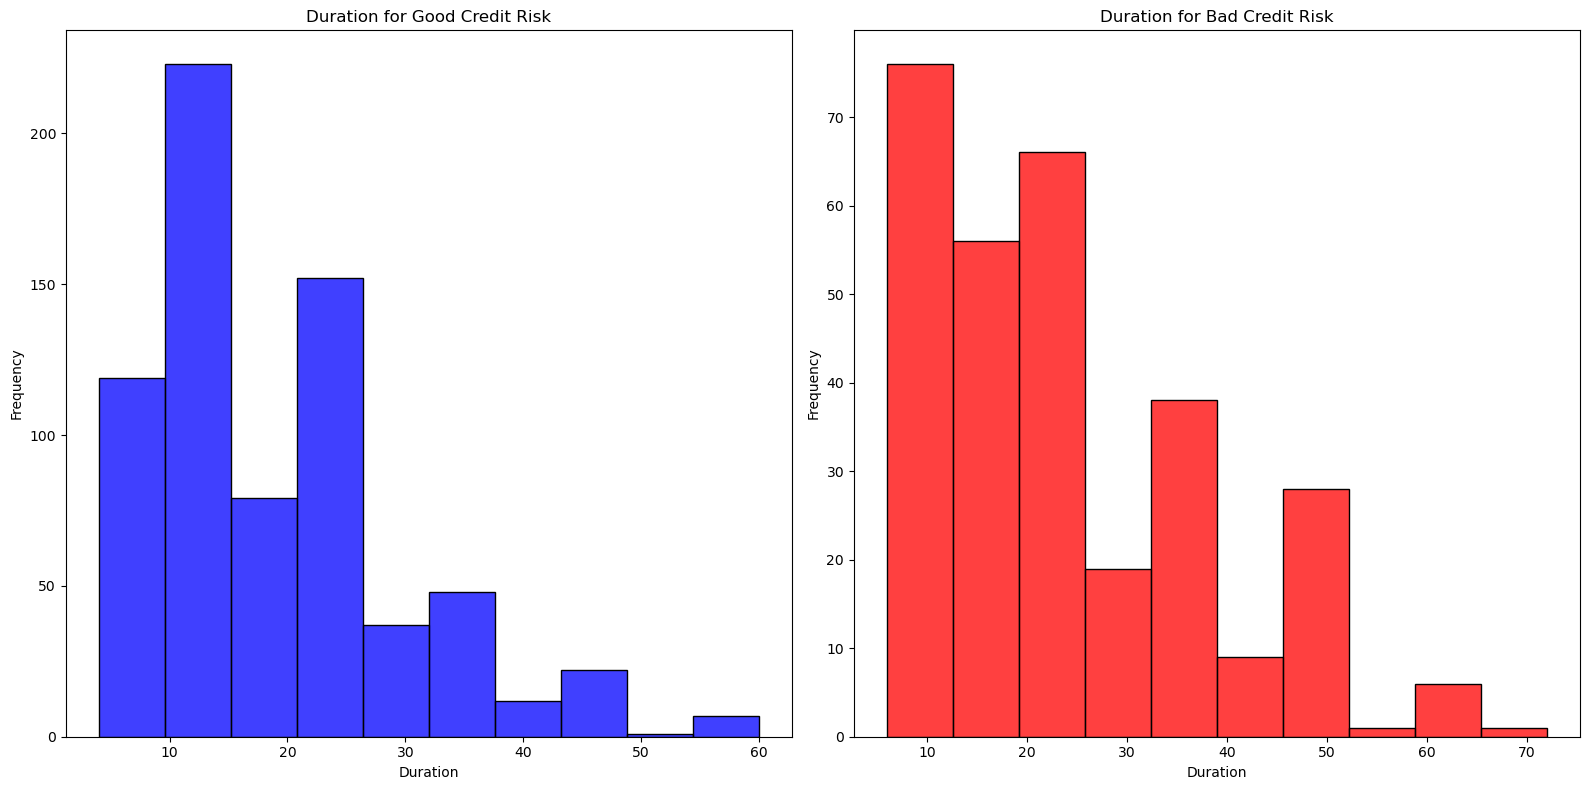

In [156]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(df[df["credit_risk"] == 1].duration, bins=10, kde=False, color="blue")
plt.title("Duration for Good Credit Risk")
plt.xlabel("Duration")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df[df["credit_risk"] == 0].duration, bins=10, kde=False, color="red")
plt.title("Duration for Bad Credit Risk")
plt.xlabel("Duration")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [157]:
df.groupby('credit_risk')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
credit_risk,,,,,,,,
0,300.0,24.860000,13.282639,6.0,12.0,24.0,36.0,72.0
1,700.0,19.207143,11.079564,4.0,12.0,18.0,24.0,60.0


1. **Good Credit Risk**: The majority of loans are shorter, concentrated between 10 and 20 months, with a sharp decline as duration increases.

2. **Bad Credit Risk**: Loans are also clustered around shorter durations (10–20 months), but the distribution is slightly more spread out compared to good credit risk, with a noticeable tail for longer durations.

**Interpretation**: Borrowers with bad credit risk tend to have slightly longer loan durations, which could indicate a higher likelihood of risk associated with extended repayment periods.

##### Kruskal-Wallis test

Performing the Kruskal-Wallis test because, based on the plot, it appears that the distribution is not normal.

In [197]:
from scipy.stats import kruskal

group_0 = df[df['credit_risk'] == 0]['duration']
group_1 = df[df['credit_risk'] == 1]['duration']

stat, p_value = kruskal(group_0, group_1)

print("Test statistics:", stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in medians for duration between the credit_risk groups")
else:
    print("No statistically significant difference in medians for duration between credit_risk groups")

Test statistics: 42.263859684710084
P-value: 7.975280722435737e-11
There is a statistically significant difference in medians for duration between the credit_risk groups


<br>

### Purpose column

<Figure size 1000x600 with 0 Axes>

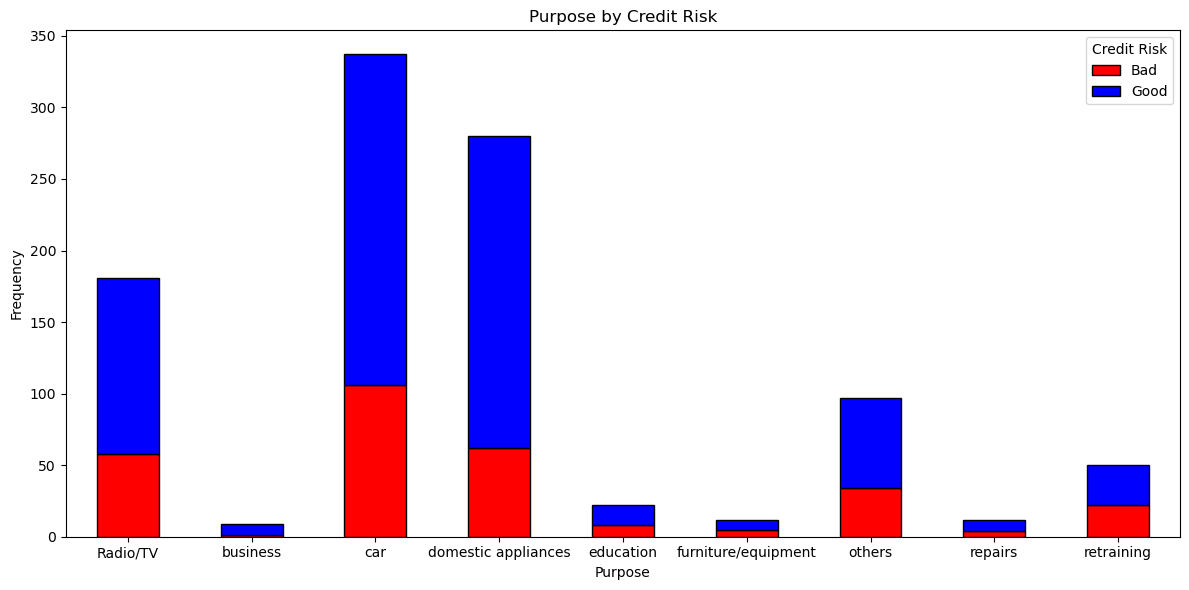

In [158]:
purpose_risk_counts = df.groupby(["purpose", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
purpose_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Purpose by Credit Risk")
plt.xlabel("Purpose")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [159]:
purpose_risk_percentage = round(purpose_risk_counts.div(purpose_risk_counts.sum(axis=1), axis=0) * 100,2)
purpose_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
purpose,,
retraining,44.00,56.00
furniture/equipment,41.67,58.33
education,36.36,63.64
others,35.05,64.95
repairs,33.33,66.67
Radio/TV,32.04,67.96
car,31.45,68.55
domestic appliances,22.14,77.86
business,11.11,88.89


In [194]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['purpose'], df['credit_risk'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 stat:", chi2)
print("p-value:", p)
if p < 0.05:
    print("We reject the null hypothesis: there is a relationship between the credit risk and purpose")
else:
    print("We do not reject the null hypothesis: no evidence of a relationship between the credit risk and purpose")


Chi2 stat: 17.57070256453905
p-value: 0.024685631655688017
We reject the null hypothesis: there is a relationship between the credit risk and purpose


The bar chart illustrates the relationship between loan purposes and credit risk categories. A Chi-squared test confirms that there is a statistically significant relationship between credit risk and loan purpose.

1. **Low Bad Credit Risk (Good Credit Risk Dominates):**
   - **Domestic appliances (22.14% bad)**: The safest purpose, with the majority of loans in this category being good credit risk.
   - **Car (31.45% bad)** and **Radio/TV (32.04% bad)**: Also associated with relatively low bad credit risk.

2. **Moderate Bad Credit Risk:**
   - **Repairs (33.33% bad)**, **others (35.05% bad)**, and **education (36.36% bad)**: Show a moderate level of bad credit risk, indicating a mixed profile.

3. **High Bad Credit Risk:**
   - **Furniture/equipment (41.67% bad)** and **retraining (44.00% bad)**: Have a higher proportion of bad credit risk.

**Interpretation:** Loan purpose influences credit risk. Domestic appliances and cars are safer, whereas retraining-related loans carry a significantly higher risk. This insight can guide lenders in risk assessment and loan approvals.

<br>

### Amount column

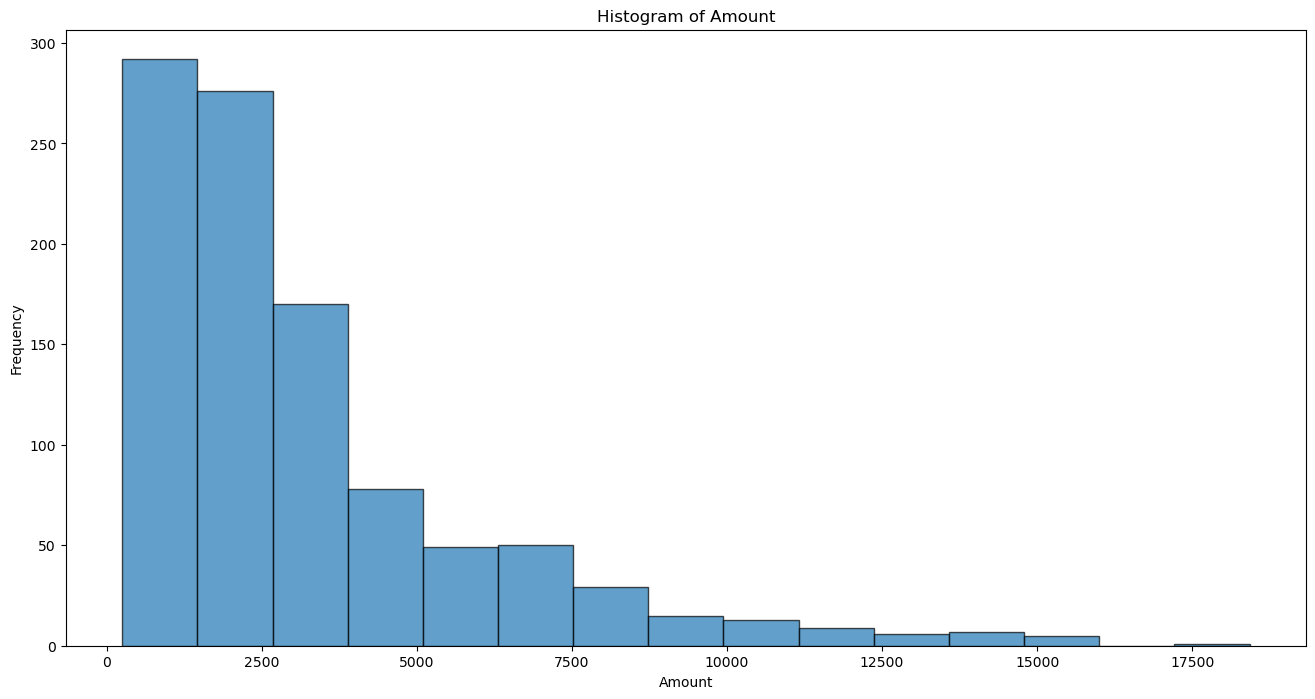

In [160]:
plt.figure(figsize=(16, 8))
plt.hist(df['amount'], bins=15, edgecolor='k', alpha=0.7)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

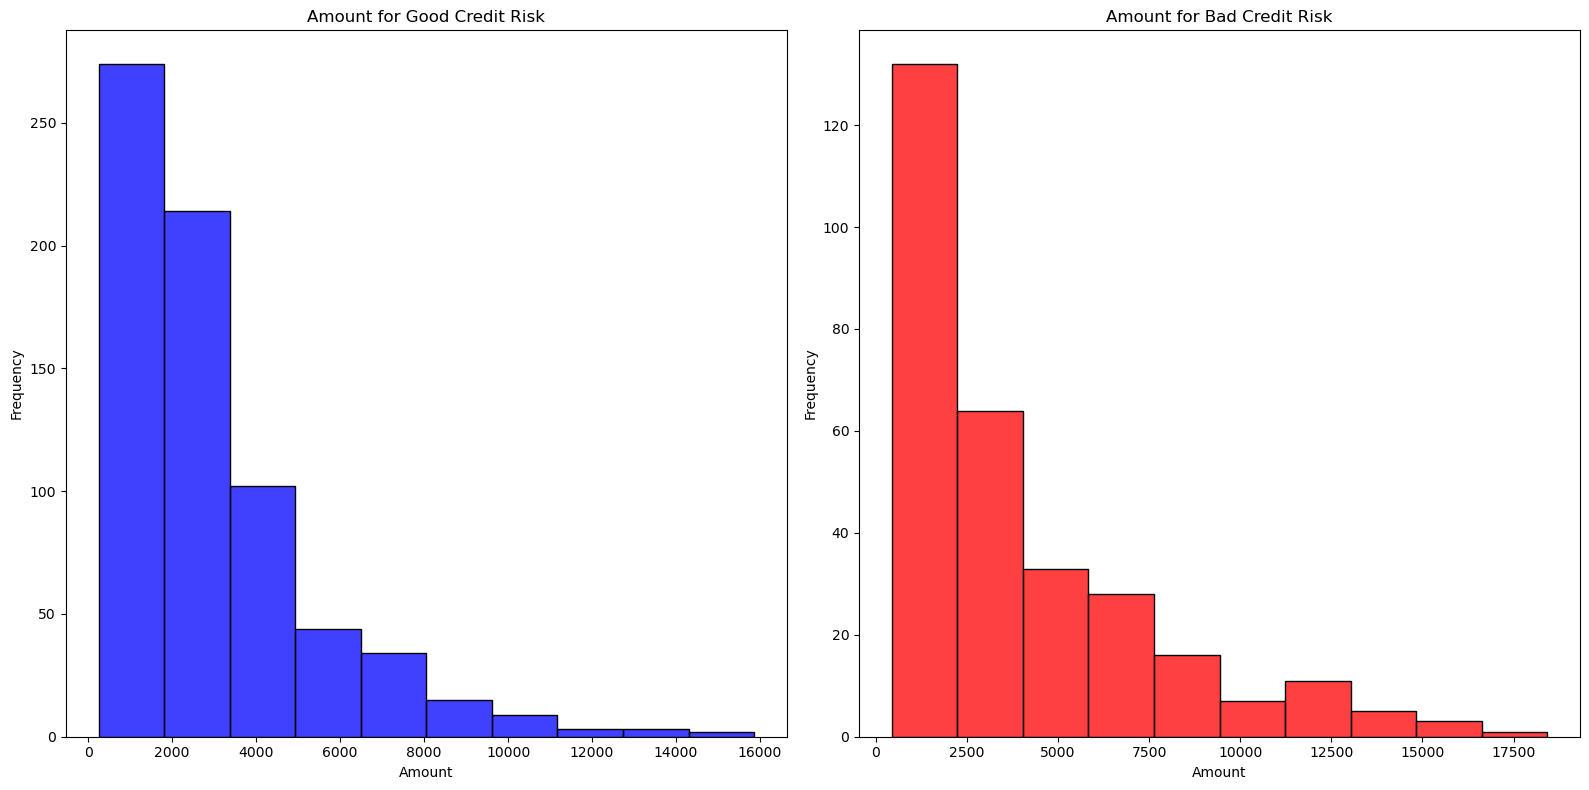

In [142]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(df[df["credit_risk"] == 1].amount, bins=10, kde=False, color="blue")
plt.title("Amount for Good Credit Risk")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df[df["credit_risk"] == 0].amount, bins=10, kde=False, color="red")
plt.title("Amount for Bad Credit Risk")
plt.xlabel("Amount")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [143]:
df.groupby('credit_risk')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
credit_risk,,,,,,,,
0,300.0,3938.126667,3535.818955,433.0,1352.5,2574.5,5141.50,18424.0
1,700.0,2985.457143,2401.472278,250.0,1375.5,2244.0,3634.75,15857.0


In [198]:
group_0 = df[df['credit_risk'] == 0]['amount']
group_1 = df[df['credit_risk'] == 1]['amount']

stat, p_value = kruskal(group_0, group_1)

print("Test statistics:", stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There is a statistically significant difference in medians for amount between the credit_risk groups")
else:
    print("No statistically significant difference in medians for amount between credit_risk groups")

Test statistics: 7.575879598542001
P-value: 0.005915450605970046
There is a statistically significant difference in medians for amount between the credit_risk groups


<br>

<Figure size 1000x600 with 0 Axes>

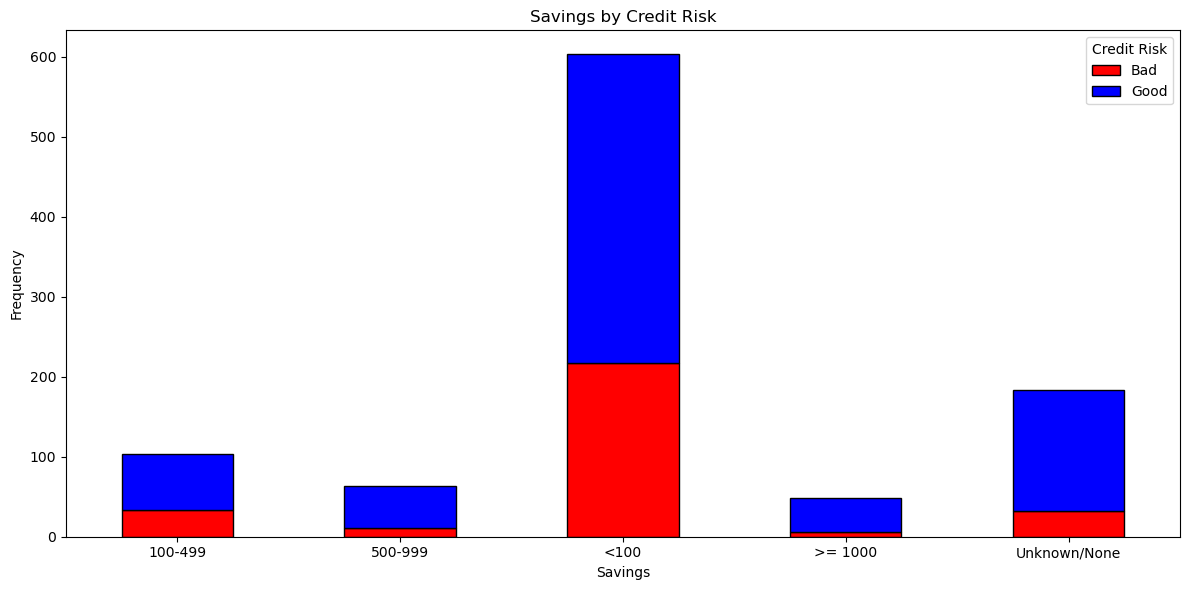

In [144]:
savings_risk_counts = df.groupby(["savings", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
savings_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Savings by Credit Risk")
plt.xlabel("Savings")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [145]:
savings_risk_percentage = round(savings_risk_counts.div(savings_risk_counts.sum(axis=1), axis=0) * 100,2)
savings_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
savings,,
<100,35.99,64.01
100-499,33.01,66.99
Unknown/None,17.49,82.51
500-999,17.46,82.54
>= 1000,12.50,87.50


<br>

<Figure size 1000x600 with 0 Axes>

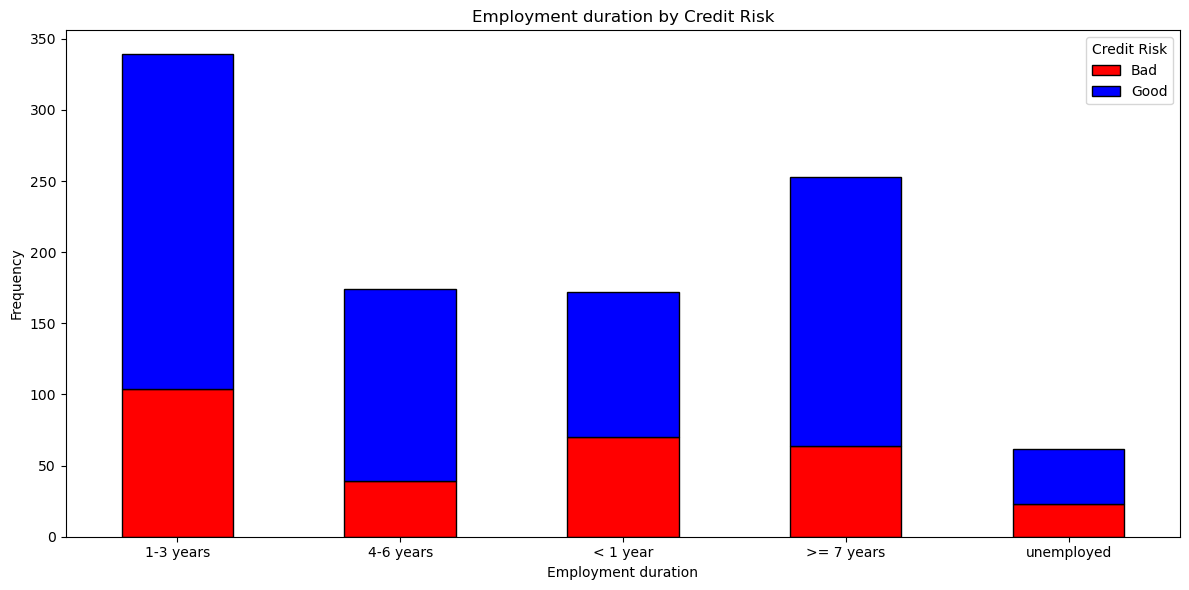

In [146]:
employment_duration_risk_counts = df.groupby(["employment_duration", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
employment_duration_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Employment duration by Credit Risk")
plt.xlabel("Employment duration")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [147]:
employment_duration_risk_percentage = round(employment_duration_risk_counts.div(employment_duration_risk_counts.sum(axis=1), axis=0) * 100,2)
employment_duration_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
employment_duration,,
< 1 year,40.70,59.30
unemployed,37.10,62.90
1-3 years,30.68,69.32
>= 7 years,25.30,74.70
4-6 years,22.41,77.59


<br>

<Figure size 1000x600 with 0 Axes>

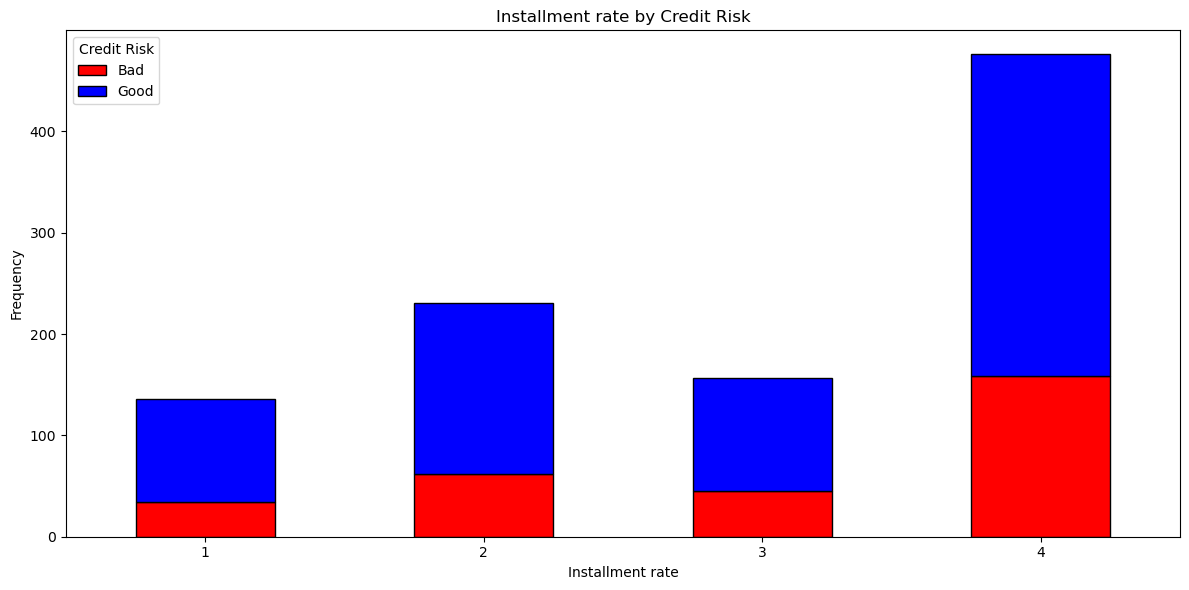

In [148]:
installment_rate_risk_counts = df.groupby(["installment_rate", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
installment_rate_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Installment rate by Credit Risk")
plt.xlabel("Installment rate")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [149]:
installment_rate_risk_percentage = round(installment_rate_risk_counts.div(installment_rate_risk_counts.sum(axis=1), axis=0) * 100,2)
installment_rate_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
installment_rate,,
4,33.40,66.60
3,28.66,71.34
2,26.84,73.16
1,25.00,75.00


<br>

<Figure size 1000x600 with 0 Axes>

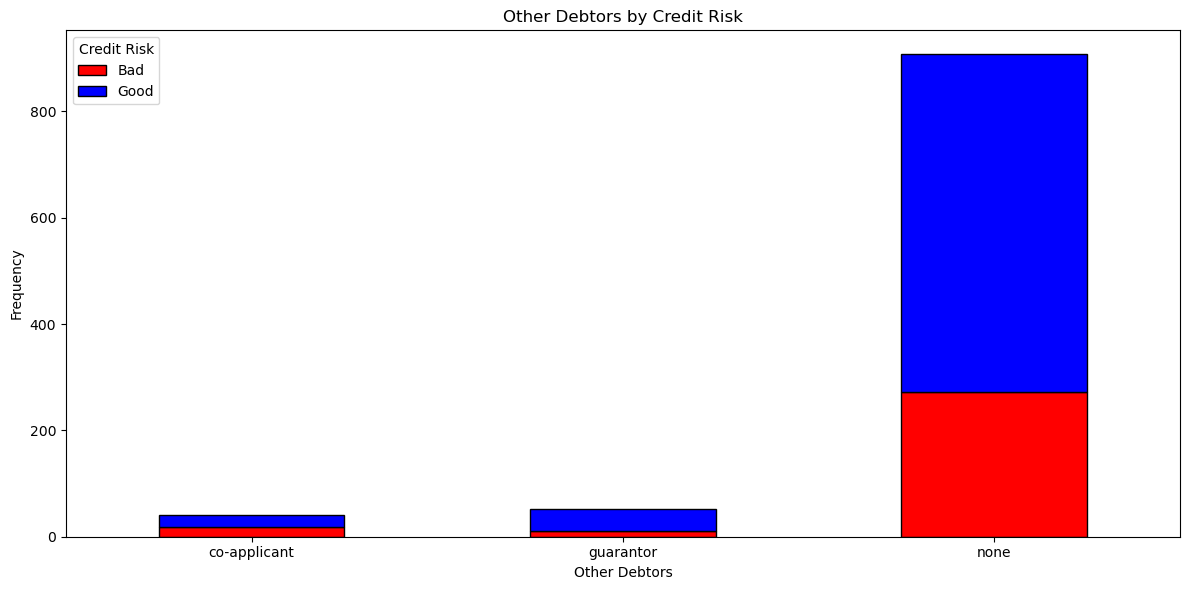

In [170]:
other_debtors_risk_counts = df.groupby(["other_debtors", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
other_debtors_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Other Debtors by Credit Risk")
plt.xlabel("Other Debtors")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [171]:
other_debtors_risk_percentage = round(other_debtors_risk_counts.div(other_debtors_risk_counts.sum(axis=1), axis=0) * 100,2)
other_debtors_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
other_debtors,,
co-applicant,43.90,56.10
none,29.99,70.01
guarantor,19.23,80.77


<br>

<Figure size 1000x600 with 0 Axes>

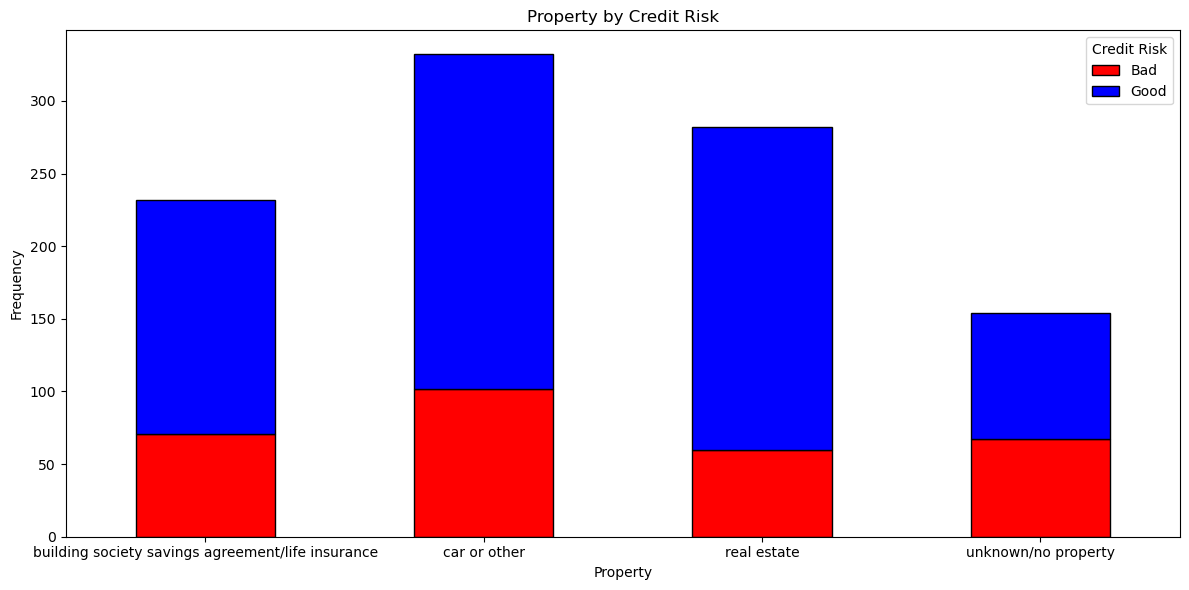

In [175]:
property_risk_counts = df.groupby(["property", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
property_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Property by Credit Risk")
plt.xlabel("Property")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [176]:
property_risk_percentage = round(property_risk_counts.div(property_risk_counts.sum(axis=1), axis=0) * 100,2)
property_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
property,,
unknown/no property,43.51,56.49
car or other,30.72,69.28
building society savings agreement/life insurance,30.60,69.40
real estate,21.28,78.72


<br>

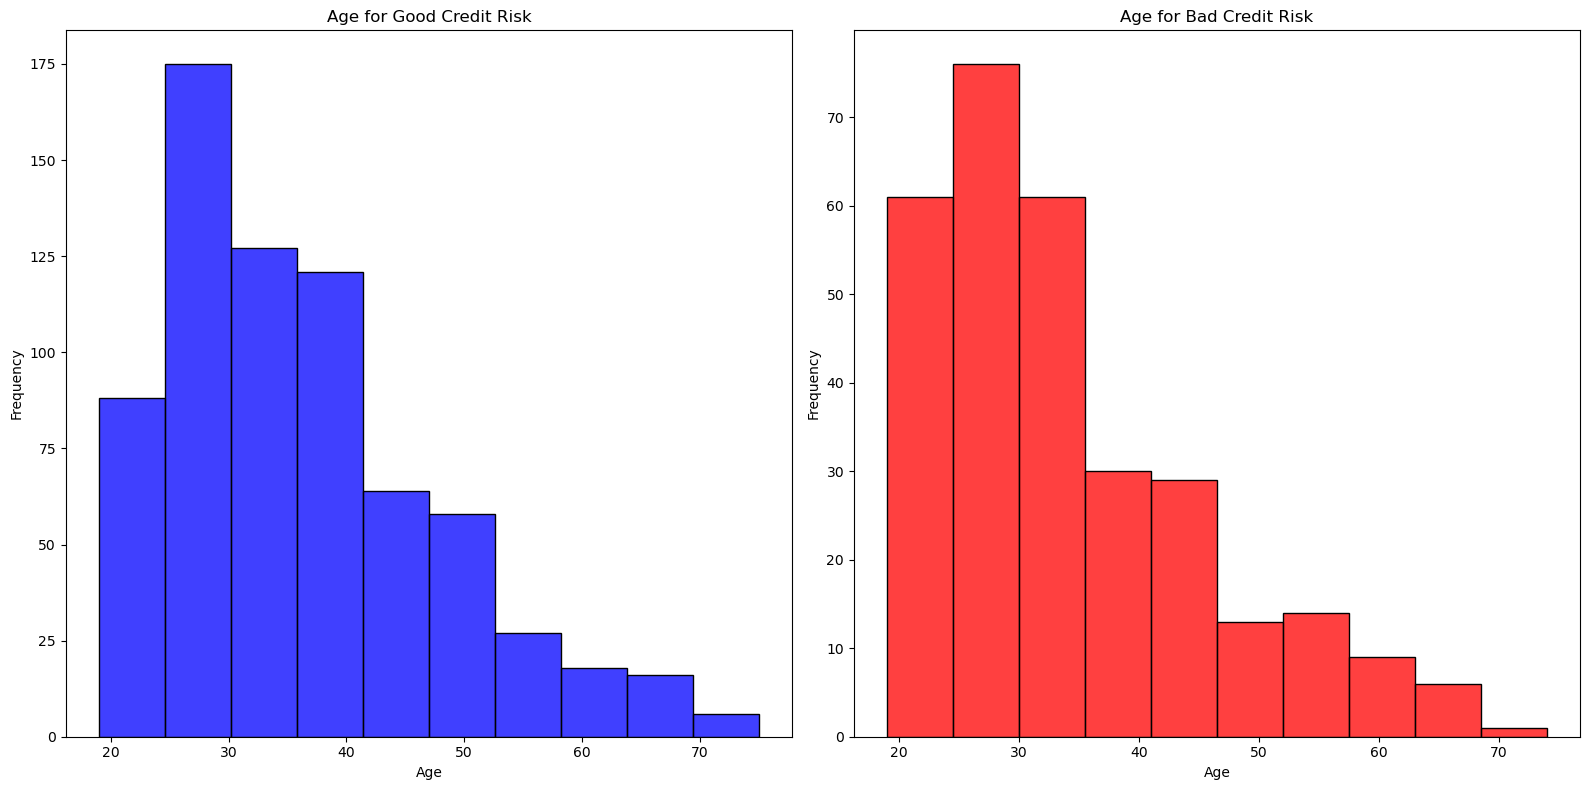

In [178]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.histplot(df[df["credit_risk"] == 1].age, bins=10, kde=False, color="blue")
plt.title("Age for Good Credit Risk")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
sns.histplot(df[df["credit_risk"] == 0].age, bins=10, kde=False, color="red")
plt.title("Age for Bad Credit Risk")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

C:\Users\GRZEGORZ\AppData\Local\Temp\ipykernel_22700\2679051192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_risk', y='age', data=df, palette='pastel')


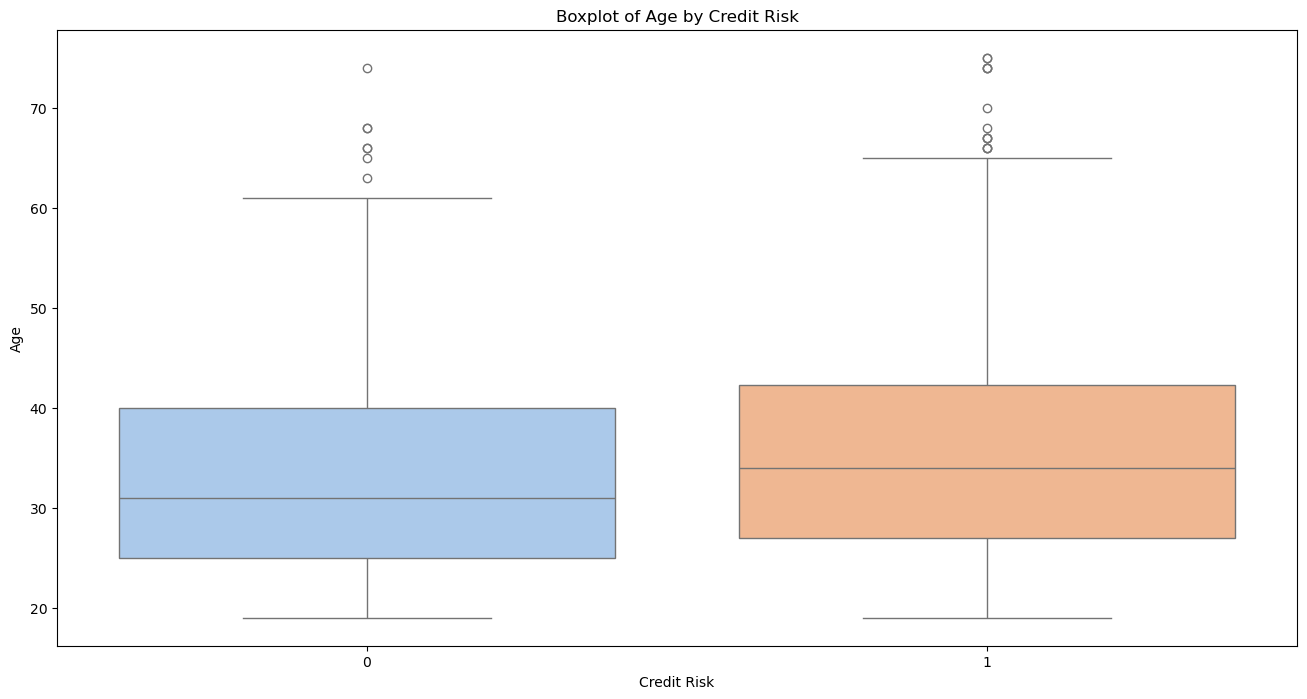

In [187]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='credit_risk', y='age', data=df, palette='pastel')
plt.title('Boxplot of Age by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Age')
plt.show()

<br>

<Figure size 1000x600 with 0 Axes>

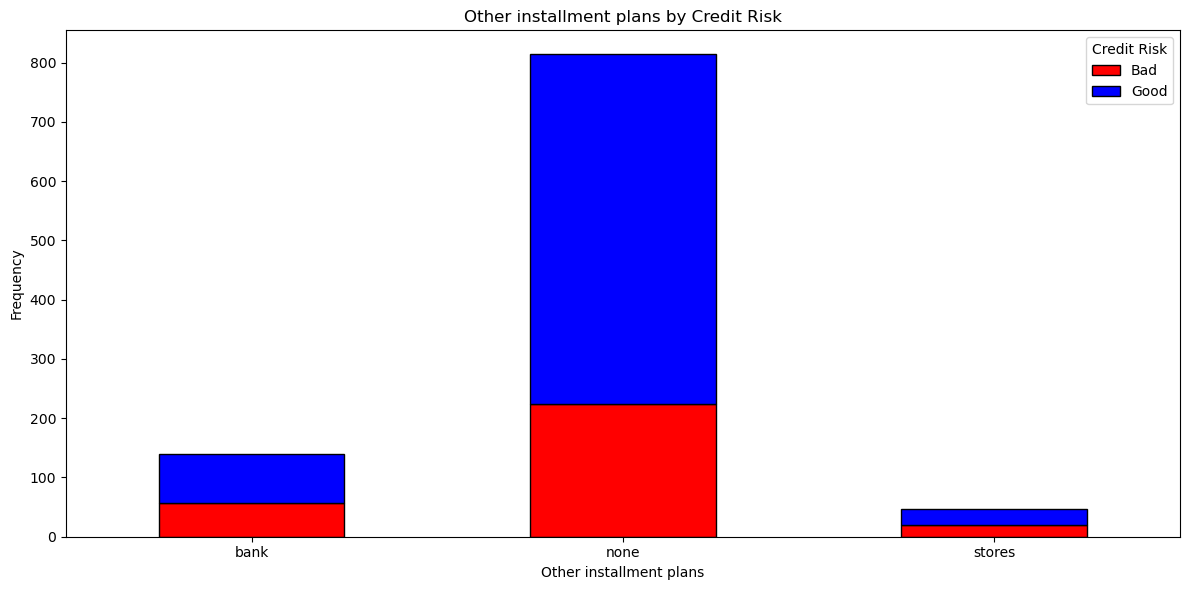

In [189]:
other_installment_plans_risk_counts = df.groupby(["other_installment_plans", "credit_risk"]).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
other_installment_plans_risk_counts.plot(kind="bar", stacked=True, color=["red", "blue"], figsize=(12, 6), edgecolor="k")

plt.title("Other installment plans by Credit Risk")
plt.xlabel("Other installment plans")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Credit Risk", labels=["Bad", "Good"])

plt.tight_layout()
plt.show()

In [190]:
other_installment_plans_risk_percentage = round(other_installment_plans_risk_counts.div(other_installment_plans_risk_counts.sum(axis=1), axis=0) * 100,2)
other_installment_plans_risk_percentage.sort_values(by=0, ascending=False)

credit_risk,0,1
other_installment_plans,,
bank,41.01,58.99
stores,40.43,59.57
none,27.52,72.48


<br>

In [191]:
df['housing'].value_counts()

housing
own         713
rent        179
for free    108
Name: count, dtype: int64

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   other_debtors            1000 non-null   object
 9   present_residence        1000 non-null   int64 
 10  property                 1000 non-null   object
 11  age                      1000 non-null   int64 
 12  other_installment_plans  1000 non-null   object
 13  housing                  1000 non-null   object
 14  number_credits           1000 non-null   

In [174]:
df['property'].value_counts() 

property
car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
unknown/no property                                  154
Name: count, dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   other_debtors            1000 non-null   object
 9   present_residence        1000 non-null   int64 
 10  property                 1000 non-null   object
 11  age                      1000 non-null   int64 
 12  other_installment_plans  1000 non-null   object
 13  housing                  1000 non-null   object
 14  number_credits           1000 non-null   

In [169]:
df['other_debtors'].value_counts()

other_debtors
none            907
guarantor        52
co-applicant     41
Name: count, dtype: int64

In [153]:
df['credit_risk'].value_counts()

credit_risk
1    700
0    300
Name: count, dtype: int64